In [76]:
#Start by importing necessary packages, for now: Pandas and NumPy.
#Import all the files, we will be using IMDB and Box Office Mojo statistics.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df1 = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df2 = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df3 = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
df4 = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
df5 = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
df6 = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df7 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
df10 = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df11 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [77]:
#Preview each of the files to understand the data and pose questions.
a = df1.head()
b = df2.head()
c = df3.head()
d = df4.head()
e = df5.head()
f = df6.head()
g = df7.head()
h = df10.head()
i = df11.head()
display(a)
display(b)
display(c)
display(d)
display(e)
display(f)
display(g)
display(h)
display(i)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [78]:
df1.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [79]:
df7[df7.duplicated(keep=False)].sort_values(by=['averagerating'])
#check for duplicates

,tconst,averagerating,numvotes


In [10]:
#potential question 2: Are some genres more popular in foreign countries and thus more successful, as opposed to domestic?/ Which genres are most popular in top 10 countries?
#A good place to start is by checking foreign vs domestic gross and number of ratings/votes.
#Use df1, df4 and df7

In [80]:
#Cleaning up df4 by dropping all rows with missing values, (large data set, dropping is fine)
#Now create a list with all the genres
ndf4 = df4.dropna()
genres = []
for x in ndf4['genres']:
    for g in x.strip('[]').split(','):
        if not g in genres:
            genres.append(g)
genres.sort()
genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [81]:
#Checks for duplicates by creating a set and removing white spaces.
genres = set(list(map(lambda x: x.strip(' '), genres)))

In [82]:
#Creating a column for each unique genre in the ndf4, with boolean values
for genre in genres:
    ndf4[genre] = ndf4['genres'].apply(lambda x: genre in x)

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
pd.set_option('max_columns', None)
ndf4.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Reality-TV,Adult,Musical,Fantasy,Western,Action,History,Animation,Drama,Biography,Music,Sci-Fi,Family,Adventure,Comedy,Short,Game-Show,Crime,Sport,Thriller,Romance,Talk-Show,War,News,Horror,Documentary,Mystery
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
ndf7 = df7.set_index(['tconst'])
ndf7

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [85]:
mdf = ndf4.set_index(['tconst']).join(ndf7, how='left').drop(['original_title', 'start_year'], axis=1)
mdf.head(5)

,primary_title,runtime_minutes,genres,Reality-TV,Adult,Musical,Fantasy,Western,Action,History,Animation,Drama,Biography,Music,Sci-Fi,Family,Adventure,Comedy,Short,Game-Show,Crime,Sport,Thriller,Romance,Talk-Show,War,News,Horror,Documentary,Mystery,averagerating,numvotes
tconst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,175.0,"Action,Crime,Drama",False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,7.0,77.0
tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama",False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,7.2,43.0
tt0069049,The Other Side of the Wind,122.0,Drama,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6.9,4517.0
tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy",False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,6.5,119.0
tt0111414,A Thin Life,75.0,Comedy,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN


In [86]:
run_dict = {}
for genre in genres:
    run_dict[genre] = mdf.loc[mdf[genre] == True]['runtime_minutes'].mean()
run_dict

{'Reality-TV': 80.23333333333333,
 'Adult': 86.28571428571429,
 'Musical': 95.42368421052632,
 'Fantasy': 91.9187074829932,
 'Western': 100.33247422680412,
 'Action': 100.019728729963,
 'History': 78.75643017434835,
 'Animation': 80.67452006980803,
 'Drama': 94.28137238413301,
 'Biography': 74.12995995631599,
 'Music': 85.45558086560365,
 'Sci-Fi': 90.54785478547855,
 'Family': 83.19204707560628,
 'Adventure': 85.78240418118467,
 'Comedy': 93.92016504341986,
 'Short': 16.4,
 'Game-Show': 117.0,
 'Crime': 95.5086310032473,
 'Sport': 80.93945613134942,
 'Thriller': 94.35133744855968,
 'Romance': 100.2165253148291,
 'Talk-Show': 86.73684210526316,
 'War': 87.1366965012205,
 'News': 66.41863517060368,
 'Horror': 87.3513827562166,
 'Documentary': 72.10787867663929,
 'Mystery': 93.23388848660392}

In [87]:
rat_dict = {}
for genre in genres:
    rat_dict[genre] = mdf.loc[mdf[genre] == True]['averagerating'].mean()
rat_dict

{'Reality-TV': 6.6,
 'Adult': 3.95,
 'Musical': 6.524451410658307,
 'Fantasy': 5.894413407821229,
 'Western': 5.82421875,
 'Action': 5.784437033508019,
 'History': 7.048927514792899,
 'Animation': 6.250835913312693,
 'Drama': 6.391691906740861,
 'Biography': 7.169184944489576,
 'Music': 6.927153404429861,
 'Sci-Fi': 5.431494140625,
 'Family': 6.401361807489942,
 'Adventure': 6.178873239436619,
 'Comedy': 6.014109836276912,
 'Short': 8.8,
 'Game-Show': 7.3,
 'Crime': 6.110742277547257,
 'Sport': 6.964604185623293,
 'Thriller': 5.592140313859949,
 'Romance': 6.14805890227577,
 'Talk-Show': nan,
 'War': 6.573962264150943,
 'News': 7.278782608695653,
 'Horror': 4.9345380945496595,
 'Documentary': 7.316787432259636,
 'Mystery': 5.891346486673589}

,Reality-TV,Adult,Musical,Fantasy,Western,Action,History,Animation,Drama,Biography,Music,Sci-Fi,Family,Adventure,Comedy,Short,Game-Show,Crime,Sport,Thriller,Romance,Talk-Show,War,News,Horror,Documentary,Mystery
Runtime,80.233333,86.285714,95.423684,91.918707,100.332474,100.019729,78.756430,80.674520,94.281372,74.129960,85.455581,90.547855,83.192047,85.782404,93.920165,16.4,117.0,95.508631,80.939456,94.351337,100.216525,86.736842,87.136697,66.418635,87.351383,72.107879,93.233888
Rating,6.600000,3.950000,6.524451,5.894413,5.824219,5.784437,7.048928,6.250836,6.391692,7.169185,6.927153,5.431494,6.401362,6.178873,6.014110,8.8,7.3,6.110742,6.964604,5.592140,6.148059,NaN,6.573962,7.278783,4.934538,7.316787,5.891346


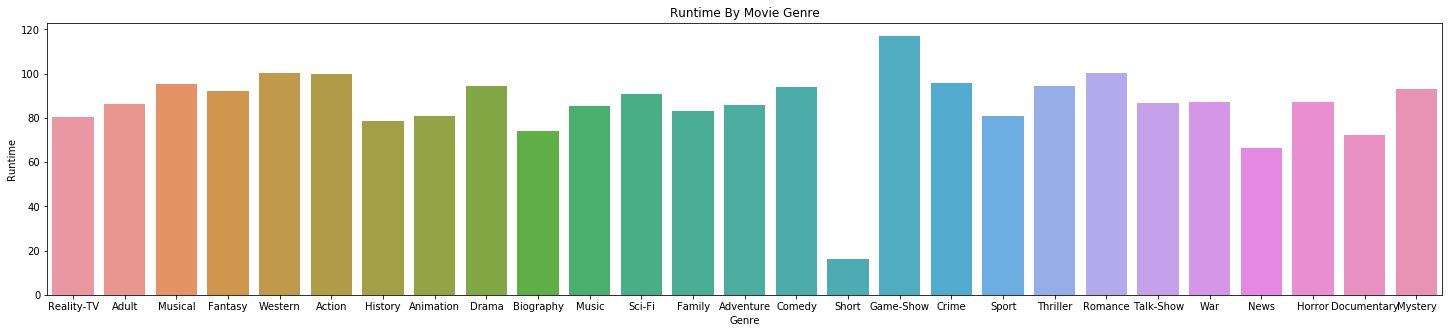

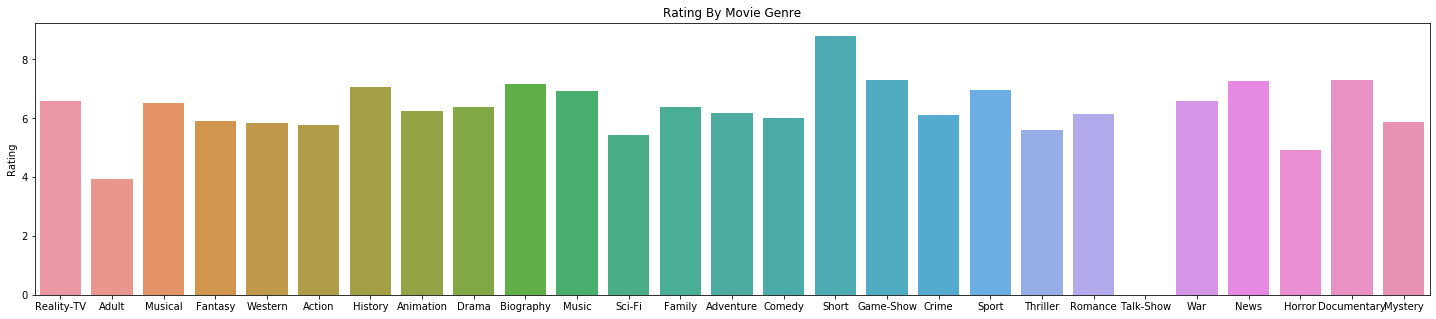

In [65]:
run_series = pd.Series(run_dict)
rate_series = pd.Series(rat_dict)

run_rate_df = pd.merge(run_series.rename('Runtime'), rate_series.rename('Rating'), right_index = True, left_index = True)

run_rate_df = run_rate_df.T

display(run_rate_df.head(5))

fig = plt.figure(figsize = (25, 5))

ax = sns.barplot(data = pd.DataFrame(run_rate_df.loc['Runtime']).T)
ax.set_title('Runtime By Movie Genre')
ax.set(ylabel='Runtime', xlabel='Genre')
plt.show()

fig2 = plt.figure(figsize = (25, 5))
ax2 = sns.barplot(data = pd.DataFrame(run_rate_df.loc['Rating']).T)
ax2.set_title('Rating By Movie Genre')
ax2.set_ylabel('Rating')
plt.show()

In [33]:
#Question: What do runtime and ratings profiles look across genres, and do they reveal any trends about each other.

'0.25.3'

In [208]:
#Locate the average runtime for individual genres, then create a loop.
ndf4.loc[ndf4['Western'] == True]['runtime_minutes'].mean()

100.33247422680412

In [10]:
#Creating a dictionary summing the boolean values for each genre; counting them.
dct = {}
for genre in genres:
    dct[genre] = ndf4[genre].sum()
dct

{'Western': 388,
 'News': 1524,
 'Sci-Fi': 2727,
 'Romance': 7782,
 'Fantasy': 2940,
 'Action': 8110,
 'Music': 4829,
 'Comedy': 20843,
 'Mystery': 4143,
 'Game-Show': 2,
 'Thriller': 9720,
 'Talk-Show': 19,
 'Biography': 8241,
 'Sport': 1949,
 'Crime': 5851,
 'Musical': 1140,
 'Family': 5608,
 'Animation': 2292,
 'Adventure': 5740,
 'Horror': 8606,
 'Short': 10,
 'Reality-TV': 60,
 'Adult': 7,
 'War': 1229,
 'Documentary': 43586,
 'History': 5793,
 'Drama': 41621}

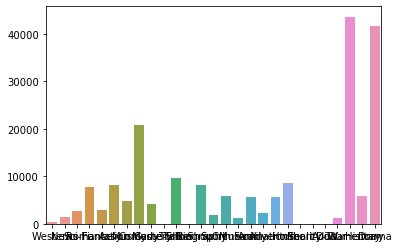

In [11]:
#A visualization for the most popular genres.
genres = list(dct.keys())
num_genres = list(dct.values())
sns.barplot(genres,num_genres)

In [212]:
DF1 = pd.merge(df7,ndf4[['tconst','Reality-TV','Musical','Documentary','Western','News',
                        'Sport', 'History', 'Short', 'Talk-Show', 'Biography',
                        'War', 'Thriller', 'Drama', 'Comedy', 'Adventure', 'Family',
                        'Mystery', 'Music', 'Animation', 'Sci-Fi', 'Crime',
                        'Game-Show', 'Action', 'Adult', 'Fantasy', 'Horror', 'Romance']], how='left')
DF1.dropna().head().set_index(['tconst'])

,averagerating,numvotes,Reality-TV,Musical,Documentary,Western,News,Sport,History,Short,Talk-Show,Biography,War,Thriller,Drama,Comedy,Adventure,Family,Mystery,Music,Animation,Sci-Fi,Crime,Game-Show,Action,Adult,Fantasy,Horror,Romance
tconst,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
tt10356526,8.3,31,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
tt10384606,8.9,559,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt1042974,6.4,20,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
tt1043726,4.2,50352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
tt1060240,6.5,21,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [49]:
runtime = df4.loc[df4['runtime_minutes'] > 0].drop(['original_title', 'start_year'], axis=1)
runtime = runtime.dropna().set_index(['tconst'])
runtime

,runtime_minutes,genres
tconst,,
tt0063540,175.0,"Action,Crime,Drama"
tt0066787,114.0,"Biography,Drama"
tt0069049,122.0,Drama
tt0100275,80.0,"Comedy,Drama,Fantasy"
tt0111414,75.0,Comedy
...,...,...
tt9916160,72.0,Documentary
tt9916170,51.0,Drama
tt9916186,84.0,Documentary


In [66]:
new_run = runtime.join(ratings, how='left').groupby(['genres']).mean().reset_index()
new_run

,genres,runtime_minutes,averagerating,numvotes
0,Action,102.427580,5.204945,858.799451
1,"Action,Adult,Comedy",71.000000,NaN,NaN
2,"Action,Adventure",99.592593,4.893750,2261.187500
3,"Action,Adventure,Animation",91.502890,6.620000,27458.084615
4,"Action,Adventure,Biography",83.068966,7.230769,76884.153846
...,...,...,...,...
1035,"Thriller,War,Western",55.000000,NaN,NaN
1036,"Thriller,Western",95.000000,6.300000,6611.000000
1037,War,93.916667,5.638462,383.538462
1038,"War,Western",138.000000,NaN,NaN


Text(0.5, 1.0, 'Movie genres: runtime vs ratings')

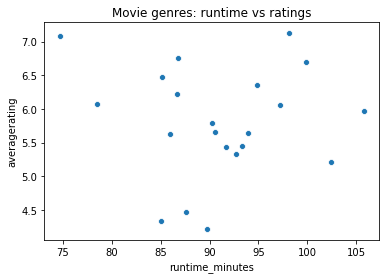

In [115]:
#Question: Is there a positive correlation between the average runtime and the average ratings 
#a genre of movies receives?
#Answer: No, it seems these 2 variables are quite independent and exhibit a neutral behavior. We can see, although small
#, that was the average runtime decreases, the average rating is not influenced and remains in fluctuation. Film
# length does not have influence on the consumers' ratings.
# This was original process, but wouldn't work because it only kept the inidividual genres; therefore some were deleted.
#     real_run = new_run[~new_run.genres.str.contains(',')].sort_values(by='runtime_minutes', ascending=False).set_index(['genres']) \
#                    .dropna().drop(['numvotes'], axis=1)
real_run
sns.scatterplot(x=real_run.runtime_minutes, y=real_run.averagerating).set_title('Movie genres: runtime vs ratings')

Text(0.5, 1.0, 'Movie genres: runtime vs ratings')

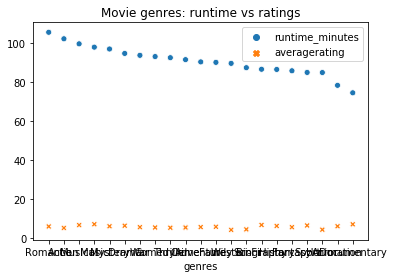

In [117]:
sns.scatterplot(data=real_run).set_title('Movie genres: runtime vs ratings')

In [54]:
df1.join(df3, how='right').set_index(['title'])

,studio,domestic_gross,foreign_gross,year,title_id,ordering,region,language,types,attributes,is_original_title
title,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,tt1699720,1,XWW,en,imdbDisplay,NaN,0.0
NaN,NaN,NaN,NaN,NaN,tt1699720,4,US,en,imdbDisplay,NaN,0.0
NaN,NaN,NaN,NaN,NaN,tt4799050,22,FR,NaN,imdbDisplay,NaN,0.0
NaN,NaN,NaN,NaN,NaN,tt2346170,2,NaN,NaN,original,NaN,1.0
NaN,NaN,NaN,NaN,NaN,tt2346170,3,US,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,tt0977855,21,BG,bg,NaN,NaN,0.0
NaN,NaN,NaN,NaN,NaN,tt8259108,3,MN,NaN,NaN,NaN,0.0
NaN,NaN,NaN,NaN,NaN,tt8750848,2,RU,NaN,NaN,NaN,0.0


In [31]:
Q1 = ndf4.sort_values(by=['start_year'], ascending=False).loc[ndf4['runtime_minutes'] > 120].drop(['original_title'], axis=1).iloc[:,6:]
Q1

,Crime,Western,News,Documentary,Sport,Reality-TV,Romance,Adult,War,Mystery,Horror,History,Musical,Adventure,Sci-Fi,Thriller,Family,Animation,Fantasy,Music,Short,Action,Drama,Talk-Show,Comedy,Biography
136826,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
127678,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3669,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False
81669,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
140276,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14010,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
13894,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
28478,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
13909,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False


In [54]:
display(df6.head())
display(df2.head())
display(df3.head())

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [43]:
directors = df6.loc[df6['category'] == 'director'].drop(['ordering', 'job', 'characters'], axis=1).set_index(['nconst'])
directors

,tconst,category
nconst,,
nm0398271,tt0111414,director
nm0362736,tt0323808,director
nm1145057,tt0417610,director
nm0707738,tt0469152,director
nm0776090,tt0473032,director
...,...,...
nm9728620,tt9679036,director
nm10436661,tt9681728,director
nm9652770,tt9689618,director


In [28]:
df2 = df2.set_index(['nconst'])

In [45]:
directors2 = df2.join(directors, how='left').drop(['birth_year', 'death_year', 'primary_profession'], axis=1).dropna() \
                    .set_index(['tconst'])
directors2

,primary_name,known_for_titles,category
tconst,,,
tt0069049,Orson Welles,"tt0048393,tt0052311,tt0057427,tt0033467",director
tt1605783,Woody Allen,"tt0091167,tt0079522,tt0075686,tt0097123",director
tt1182350,Woody Allen,"tt0091167,tt0079522,tt0075686,tt0097123",director
tt2334873,Woody Allen,"tt0091167,tt0079522,tt0075686,tt0097123",director
tt2870756,Woody Allen,"tt0091167,tt0079522,tt0075686,tt0097123",director
...,...,...,...
tt8743078,Marija Ratkovic Vidakovic,tt8743078,director
tt8743182,Fanny Hozleiter,tt8743182,director
tt8743182,Pegasus Envoyé,tt8743182,director


In [46]:
directed_movies = df3.join(directors2, how='right').drop(['types', 'attributes', 'ordering'], axis=1)
directed_movies.isna().sum()

title_id             142189
title                142189
region               142189
language             142189
is_original_title    142189
primary_name              0
known_for_titles          0
category                  0
dtype: int64

In [37]:
df7.describe()
#We decided that based on percentiles

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [55]:
ratings = df7.sort_values(by=['averagerating'], ascending=False).loc[df7['numvotes'] > 50].set_index(['tconst'])
ratings
#sorting the movies by their average rating for ratings that received more than 50 votes.
#Question: Is there a positive correlation between the number of votes a movie receives and its average rating?
#expanding: Would people be more likely to rate a good movie? Or not necessarily and rate bad movies as well.

,averagerating,numvotes
tconst,,
tt9537008,9.9,417
tt9787524,9.7,72
tt8718580,9.7,639
tt7131622,9.7,5600
tt9760512,9.6,427
...,...,...
tt7131966,1.0,76
tt2100624,1.0,429
tt6010140,1.0,230


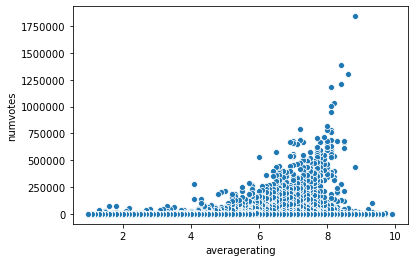

In [39]:
sns.scatterplot(ratings['averagerating'], ratings['numvotes'])

In [119]:
display(df10.head())
display(df11.head())

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [88]:
df10 = df10.set_index(['title']).drop(['Unnamed: 0','genre_ids','original_language','original_title'],axis=1)

In [89]:
df10

,id,popularity,release_date,vote_average,vote_count
title,,,,,
Harry Potter and the Deathly Hallows: Part 1,12444,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,10191,28.734,2010-03-26,7.7,7610
Iron Man 2,10138,28.515,2010-05-07,6.8,12368
Toy Story,862,28.005,1995-11-22,7.9,10174
Inception,27205,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...
Laboratory Conditions,488143,0.600,2018-10-13,0.0,1
_EXHIBIT_84xxx_,485975,0.600,2018-05-01,0.0,1
The Last One,381231,0.600,2018-10-01,0.0,1


In [66]:
#For second question just look at one dataframe from df10 or df11.
#How do movies with lower vote counts fare against movies with higher vote counts (looking at popularity and voting average)
df10['vote_count'].mean()

194.22483689708488

In [90]:
#Remove null values by locating movies with a higher than 0 average: because that means they received 0 votes and skew our data.
df10 = df10.loc[df10['vote_average'] > 0.0].drop(['Low'],axis=1)
df10

KeyError: "['Low'] not found in axis"

In [197]:
df10['popularity'].mean()

4.515621546306178

In [198]:
df10['vote_average'].mean()

5.899656112889838

In [91]:
votes = ["High"]
for vote in votes:
    df10[vote] = df10['vote_count'].apply(lambda x: x > 194)

In [92]:
df10
#A conclusion to draw from this process is that popularity is partially based on vote_count. We can see
#that the lower the vote_count, the lower the popularity score.

,id,popularity,release_date,vote_average,vote_count,High
title,,,,,,
Harry Potter and the Deathly Hallows: Part 1,12444,33.533,2010-11-19,7.7,10788,True
How to Train Your Dragon,10191,28.734,2010-03-26,7.7,7610,True
Iron Man 2,10138,28.515,2010-05-07,6.8,12368,True
Toy Story,862,28.005,1995-11-22,7.9,10174,True
Inception,27205,27.920,2010-07-16,8.3,22186,True
...,...,...,...,...,...,...
Laboratory Conditions,488143,0.600,2018-10-13,0.0,1,False
_EXHIBIT_84xxx_,485975,0.600,2018-05-01,0.0,1,False
The Last One,381231,0.600,2018-10-01,0.0,1,False


In [96]:
high_vote = df10.loc[df10['High'] == True]
low_vote = df10.loc[df10['High'] == False]
high_vote

,id,popularity,release_date,vote_average,vote_count,High
title,,,,,,
Harry Potter and the Deathly Hallows: Part 1,12444,33.533,2010-11-19,7.7,10788,True
How to Train Your Dragon,10191,28.734,2010-03-26,7.7,7610,True
Iron Man 2,10138,28.515,2010-05-07,6.8,12368,True
Toy Story,862,28.005,1995-11-22,7.9,10174,True
Inception,27205,27.920,2010-07-16,8.3,22186,True
...,...,...,...,...,...,...
All I See Is You,345923,7.312,2017-10-27,4.9,311,True
The Party,415401,7.233,2018-02-16,6.4,229,True
Dragon Ball Super: Broly,503314,6.868,2019-01-16,7.4,721,True


/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


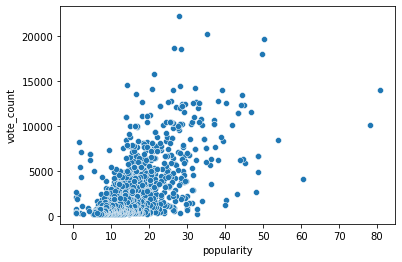

In [95]:
sns.scatterplot(high_vote['popularity'], high_vote['vote_count'])
#clumped and hard to tell but we can see an increasing trend as it fluctuates.

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


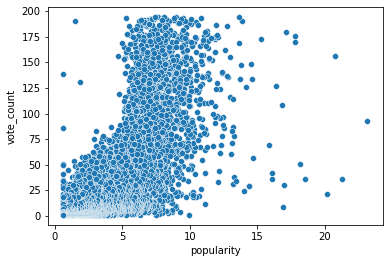

In [98]:
sns.scatterplot(low_vote['popularity'], low_vote['vote_count'])
#Looking at the visualizations, it demonstrates that there is no major correlation between popularity and vote count;
#however, there is more of a positive correlation for the high vote counts. Therefore is seems that movies with
#high vote counts seem to fare better than movies with low vote counts.

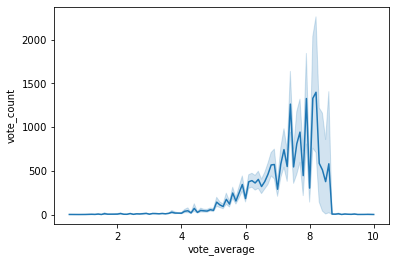

In [204]:
sns.lineplot(df10['vote_average'], df10['vote_count'])
#There is a clear left skew, as the vote average increases, the vote count exponentially increases.

In [ ]:
#We can infer that from both of these graphs that the vote count increases as the popularity and vote average increase.
#So, we can say that the vote count is directly correlated to the vote average and the vote count. 
#With some exceptions. The mean is less than the median because it is pulled by the lower values.

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


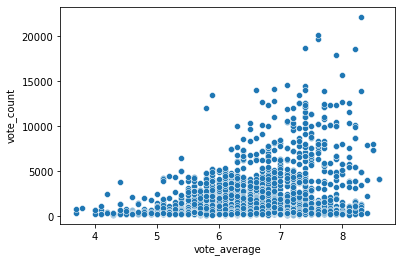

In [99]:
sns.scatterplot(high_vote['vote_average'], high_vote['vote_count'])

/Users/MZhang/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


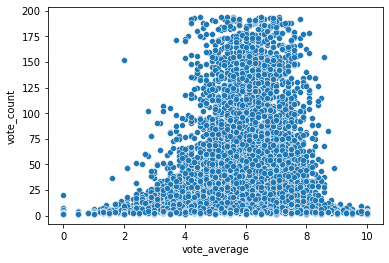

In [100]:
sns.scatterplot(low_vote['vote_average'], low_vote['vote_count'])

In [ ]:
#Same thing, it seems that for low vote counts, the vote average doesn't reveal much of a trend. But, how high votes
#there is some positive correlation that as the vote average increases, the number of votes does as well.